Simple Linear Regeressions
=====

Some of the code contained within this notebook is from Ch. 5 of *Data Science from Scratch* by J. Grus.



Imagine someone gives you a set of data.  Perhaps it is data on friendships (e.g., how many a friends a person has, a list of friends for each person, etc.)  Can we construct a model to to predict the number of friends for a user based on the usage of a site.  

Consider some data taken from a survey of the users of the website *DataScience*.  It represents the self-reported number of friends by each user.  We also average number of minutes the user spends on the site.


In [4]:
daily_minutes = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
num_friends = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


We will use the linear [model package from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(daily_minutes).reshape((-1,1))
y = np.array(num_friends)

reg = LinearRegression().fit(X, y)

print reg.score(X, y)
print reg.coef_
print reg.intercept_


0.32910783778363006
[0.36411134]
-3.7418410385496808


Let's go ahead and cacluate the mean squared differece on the training data.

In [8]:
def mean_squared_difference(a, b):
    return np.square((a - b)).sum() / a.shape[0]

y_hat = reg.predict(X)
print mean_squared_difference(y, y_hat)

26.18766805518492


Or we could use a built in ...

In [9]:
from sklearn.metrics import mean_squared_error
    
print mean_squared_error(y, y_hat)

26.18766805518492


In [10]:
def mean_difference(a, b):
    return np.sqrt(np.square((a - b))).sum() / a.shape[0]
    
print mean_difference(y, y_hat)

3.6616686446640085


Let's plot the data with the model.  We'll also make some predictions.

(100,) (100, 1)


[0, 105, -5, 100]

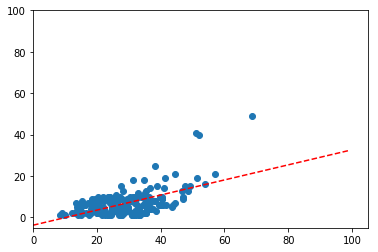

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.arange(0, 100, 1)
p = reg.predict(t.reshape((-1,1)))

print t.shape, t.reshape((-1,1)).shape

plt.scatter(X, y)
plt.plot(t, p, 'r--')
plt.axis([0,105,-5,100])


What is wrong with the model?

In [13]:
print reg.coef_
print reg.intercept_

[0.36411134]
-3.7418410385496808


Let's generate some additional data and see if we can achieve a perfect fit.

In [15]:
X = np.array([5, 2, 10, 8, 14, -1]).reshape(-1,1)
y = 2 * X + 3

reg = LinearRegression().fit(X, y)
print "Score: ", reg.score(X, y)


Score:  1.0


[0, 105, -5, 100]

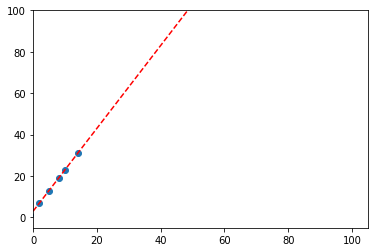

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.arange(0, 100, 1)
p = reg.predict(t.reshape(-1,1))

plt.scatter(X, y)
plt.plot(t, p, 'r--')
plt.axis([0,105,-5,100])

Let's generate yet another dataset.  How do you think this one will work out?

In [17]:
X = np.array([5, 2, 10, 8, 14, -1]).reshape(-1,1)
y = 2 * (X - 5) * (X - 5) + 3

reg = LinearRegression().fit(X, y)
print "Score: ", reg.score(X, y)

Score:  0.2758861940298507


What is going on here?

In [20]:
print np.corrcoef(X.flatten(), y.flatten())

[[1.        0.5252487]
 [0.5252487 1.       ]]


[-10, 105, -5, 100]

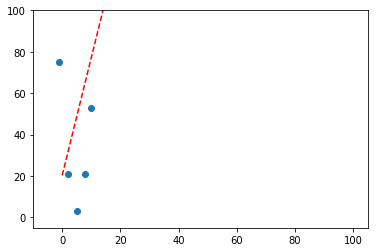

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.arange(0, 100, 1)
p = reg.predict(t.reshape(-1,1))

plt.scatter(X, y)
plt.plot(t, p, 'r--')
plt.axis([-10,105,-5,100])

In [28]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

# Pull off only one of the attributes
X = X[:,5].reshape((-1, 1))

reg = LinearRegression().fit(X, y)

# Check on performance
y_hat = reg.predict(X)

print "MD: ", mean_difference(y, y_hat)
print "Score:", reg.score(X, y)

MD:  4.4477729015322325
Score: 0.4835254559913343


[2, 10, -5, 100]

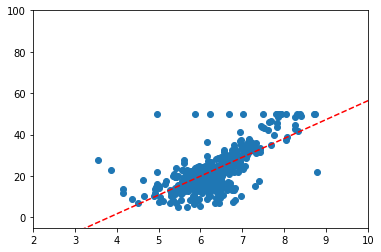

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.arange(0, 100, 1)
p = reg.predict(t.reshape(-1,1))

plt.scatter(X, y)
plt.plot(t, p, 'r--')
plt.axis([2,10,-5,100])

What do you think would be the next step?